loading Roboflow workspace...
loading Roboflow project...


from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.21.0`. Use `Detections.from_inference` instead.


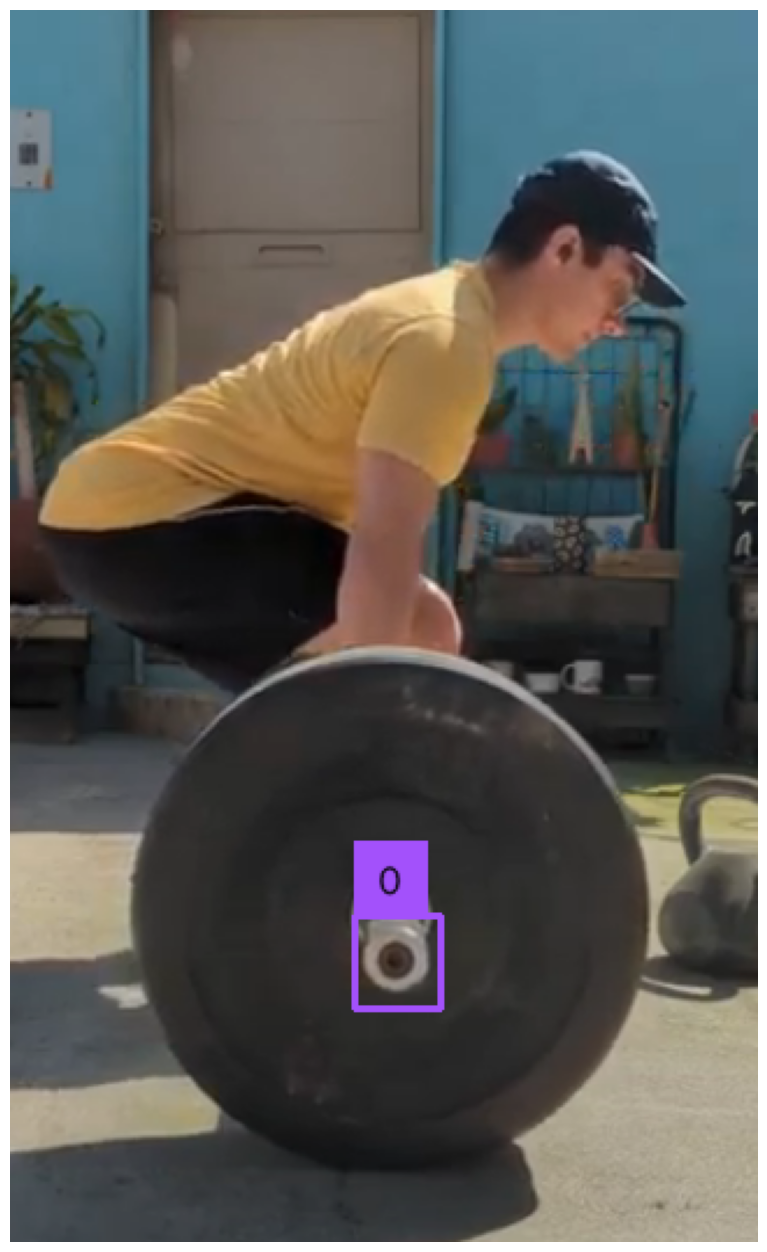

In [1]:
from roboflow import Roboflow
import supervision as sv
import cv2
import numpy as np

rf = Roboflow(api_key="5LfzIz5K5JBvcYSwepkD")
project = rf.workspace().project("barbell-detector-bncfm")
model = project.version(2).model

result = model.predict("Capture.PNG", confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread("Capture.PNG")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)

# annotated_image = label_annotator.annotate(
#     scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

In [2]:
result

{'predictions': [{'x': 166.5,
   'y': 410.0,
   'width': 37.0,
   'height': 40.0,
   'confidence': 0.8946099877357483,
   'class': 'Barbell',
   'class_id': 0,
   'detection_id': '893a8329-397f-40e5-9ba3-a2c7869fdb2e',
   'image_path': 'Capture.PNG',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '322', 'height': '531'}}

In [3]:
x,y,w,h = result['predictions'][0]['x'], result['predictions'][0]['y'], result['predictions'][0]['width'], result['predictions'][0]['height']
x,y,w,h

(166.5, 410.0, 37.0, 40.0)

In [5]:
image = cv2.imread("Capture.PNG")  # Load your image
img, p1, p2 = drawBox(image, x, y, w, h)

x, y = p1
w, h = ((p2[0] - p1[0]), (p2[1] - p1[1]))
bbox = (x, y, w, h)

# sv.plot_image(image=img, size=(16, 16))

In [6]:
cv2.imshow("Inference", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
from roboflow import Roboflow
import supervision as sv
import cv2
import numpy as np

rf = Roboflow(api_key="5LfzIz5K5JBvcYSwepkD")
project = rf.workspace().project("barbell-detector-bncfm")
model = project.version(2).model

# cap = cv2.VideoCapture(1)
p1, p2 = None, None
state = 0
# tracker = cv2.legacy.TrackerMOSSE_create()


def drawBox(img, x, y, w, h):
    x1 = int(x) - int(w/2)
    y1 = int(y) - int(h/2)
    
    x2 = int(x) + int(w/2)
    y2 = int(y) + int(h/2)

    p1 = (x1, y1)
    p2 = (x2, y2)
    


    b = cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)
    return b, p1, p2

def drawBox_fromtracker(img, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)


def img_to_rgb(image):
    """
    Convert an image to RGB format using OpenCV.

    Parameters:
        image (numpy.ndarray): Input image in BGR or grayscale format.

    Returns:
        numpy.ndarray: Image in RGB format.
    """
    # Convert the image from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return rgb_image

video_path = r'C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\sports-performance\pose-estimation-analysis\files\single-squat-225.mp4'
cap = cv2.VideoCapture(video_path)
leavy = cv2.legacy.TrackerCSRT_create()

loading Roboflow workspace...
loading Roboflow project...


In [24]:
# Set the desired window size
cv2.namedWindow('Video', cv2.WINDOW_NORMAL)  # Set window to allow resizing
# cv2.resizeWindow('Video', 640, 1000)  # Set initial window size

# Check if the video opened successfully

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = 0

ret, frame = cap.read()

bar_path = {}

center_points = []

# Get input video properties
input_fps = cap.get(cv2.CAP_PROP_FPS)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # H.264 codec
out = cv2.VideoWriter('annotated_video.mp4', fourcc, input_fps, (frame_width, frame_height))


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

if ret:
    result = model.predict(frame, confidence=40, overlap=30).json()
    x,y,w,h = result['predictions'][0]['x'], result['predictions'][0]['y'], result['predictions'][0]['width'], result['predictions'][0]['height']

    bbox = (x, y, w, h)
    
    img, p1, p2 = drawBox(frame, x, y, w, h)

    # cv2.imshow("Video", img)
    # cv2.waitKey(0)
    
    x, y = p1
    w, h = ((p2[0] - p1[0]), (p2[1] - p1[1]))

    bbox = (x, y, w, h) #new value

    # if result:

while cap.isOpened():
    success, img = cap.read()

    # frame_time_seconds = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000

    frame_time_seconds = frame_count/fps #frames to seconds

    ret, bbox = leavy.update(img)

    x = int(bbox[0] + (bbox[2] // 2))
    y = int(bbox[1] + (bbox[3] // 2))


    center_point = (x, y)

    bar_path[round(frame_time_seconds, 2)] = center_point

    center_points.append(center_point)

    # print(center_points)

    if ret:
        # drawBox_fromtracker(img, bbox)
        # print(center_point)

        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)  # Draw a red circle
        if len(center_points) > 1:
            for i in range(5, len(center_points)):
                pt1 = center_points[i - 1]
                pt2 = center_points[i]
                pt1 = (int(pt1[0]), int(pt1[1]))
                pt2 = (int(pt2[0]), int(pt2[1]))
                cv2.line(img, pt1, pt2, (0, 0, 255), 2)

    if success:
        x, y = p1
        w, h = ((p2[0] - p1[0]), (p2[1] - p1[1]))
        bbox = (x, y, w, h)
        
        #cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)  
        leavy.init(img,bbox)


        cv2.imshow("Video", img)
        out.write(img)
        
    # Exit loop if 'q' is pressed
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

    else:
        cap.release()
        cv2.destroyAllWindows()
        break

    frame_count+=1

cap.release()
cv2.destroyAllWindows()
